# <span style="color:blue"> Projeto 02 - Previsão de Renda </span>
<span style="color:blue"> Este notebook é semelhante ao visto em vídeo, mas contém células azuis como esta, que trazem instruções para a sua atividade.</span>

<span style="color:blue">Após realizar as tarefas indicadas, você vai fazer o upload do seu arquivo no GitHub e enviar o link para a EBAC, ou alternativamente, fazer o upload do arquivo na plataforma da EBAC. Recomendamos o github, pois assim você já vai montando o seu portfólio.</span>

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos.

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. São 14 variáveis,  com o respectivo dicionário.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes.

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| data_ref| data | numérico |
| id_cliente| código do cliente | inteiro|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo_emprego | tempo de emprego em anos |inteiro|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| renda |renda do indivíduo |inteiro|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7ce73e4ba312b3762b4b6f612c25337ed9b98942e6eca771b8efdb76f8abdcf5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [3]:
from ydata_profiling import ProfileReport

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [4]:
# Observe que demo01.csv está na mesma pasta que este notebook
# do contrário, seria necessário indicar a pasta no nome do arquivo
df = pd.read_csv('previsao_de_rendaa.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (15000, 15)


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [5]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof.to_file('./output/df.html')

Uma outra forma de analisar os dados é por meio da análise da média e mediana e pela distribuição da renda em um gráfico, conforme a seguir:

In [7]:
#média e mediana da renda
print(df['renda'].mean())
print(df['renda'].median())


5697.287056666667
3499.72


Text(0, 0.5, 'Frequência')

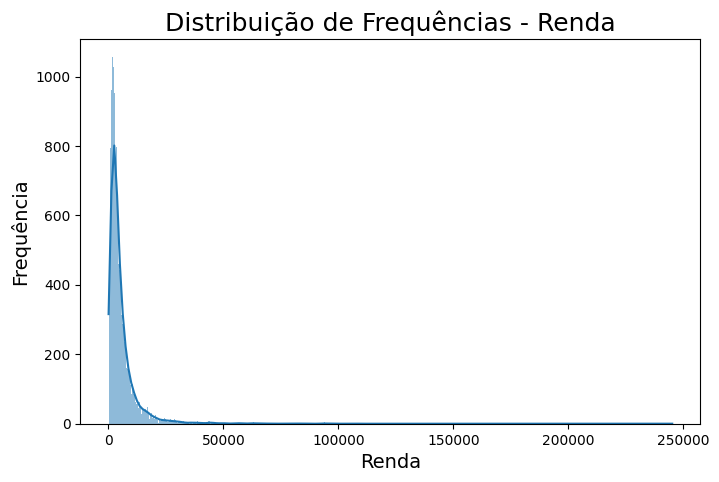

In [8]:
# Verificando a distribuição de frequência da renda.
fig, ax = sns.histplot(df['renda'], kde=True, edgecolor=None).figure, plt.gca()
fig.set_size_inches(8, 5)
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

### <span style="color:blue">Tarefa 01 - gráfico de barras</span>
<span style="color:blue">  Construa um gráfico de barras para pelo menos duas variáveis.


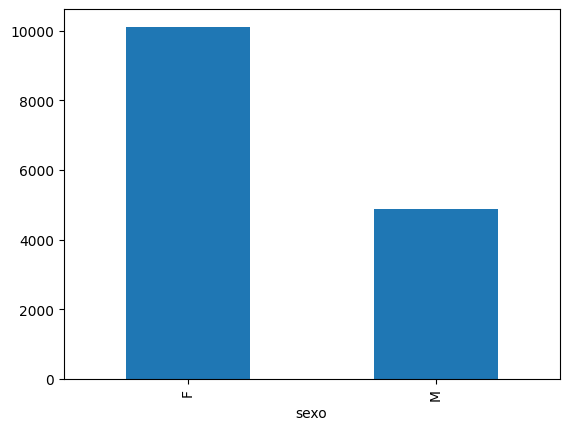

In [10]:
#Primeira variável
graf_sexo = df['sexo'].value_counts().plot.bar()

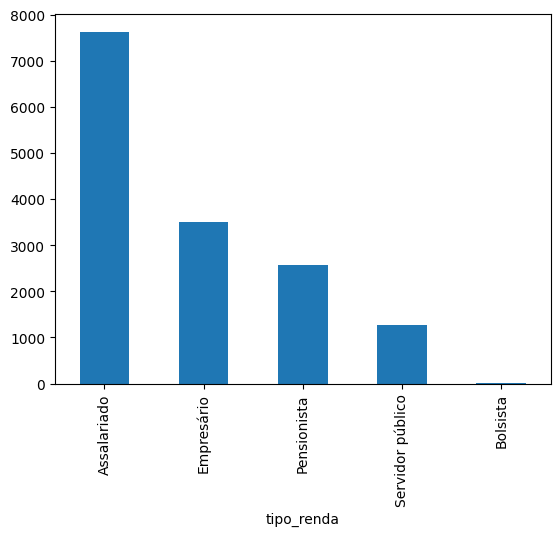

In [11]:
#Segunda variável
graf_tipo_renda = df['tipo_renda'].value_counts().plot.bar()

### <span style="color:blue">Tarefa 02 - Histograma </span>
<span style="color:blue"> Construa o histograma da variavel ```idade```.  </span>


<Figure size 640x480 with 0 Axes>

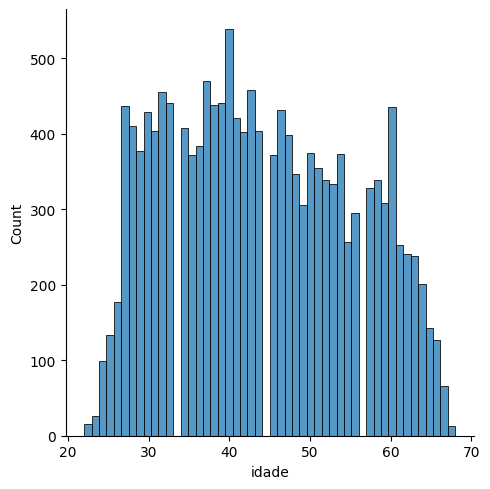

In [12]:
#Terceira variável
plt.clf()
var = "idade"

sns.displot(df, x = var, bins = 50)
plt.show()

### Entendimento dos dados - Bivariadas




Homens ganham proporcionalmente mais relação às mulheres. Isso pode ser observado pela mediana maior do sexo masculino em comparação ao feminino no boxplot:

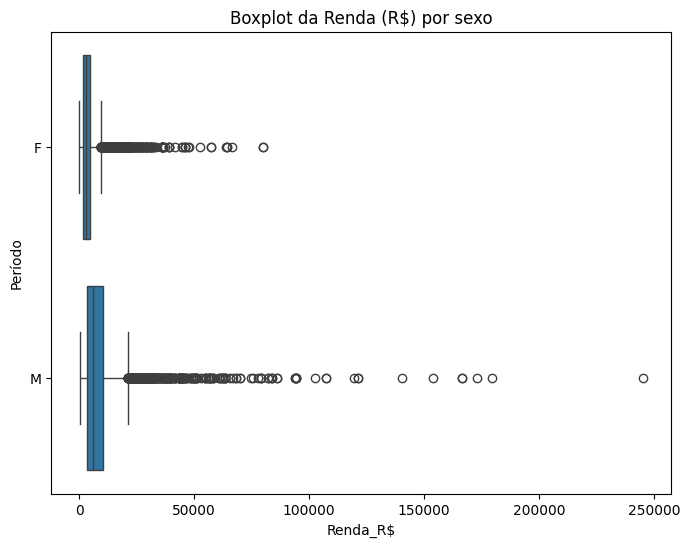

In [13]:
# Plotamos um gráfico Boxplot da renda por sexo
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='renda', y='sexo')
plt.title('Boxplot da Renda (R$) por sexo')
plt.xlabel('Renda_R$')
plt.ylabel('Período')
plt.show()

### <span style="color:blue">Tarefa 03 - Bivariada </span>
<span style="color:blue"> Construa uma análise bivariada para a variável  ```tempo_emprego```.  Em seguida, insira uma célula de markdown e conclua se a variável parece discriminar risco de crédito. </span>



No gráfico a seguir, observa-se que a renda é maior em indivíduos com maior tempo de emprego.

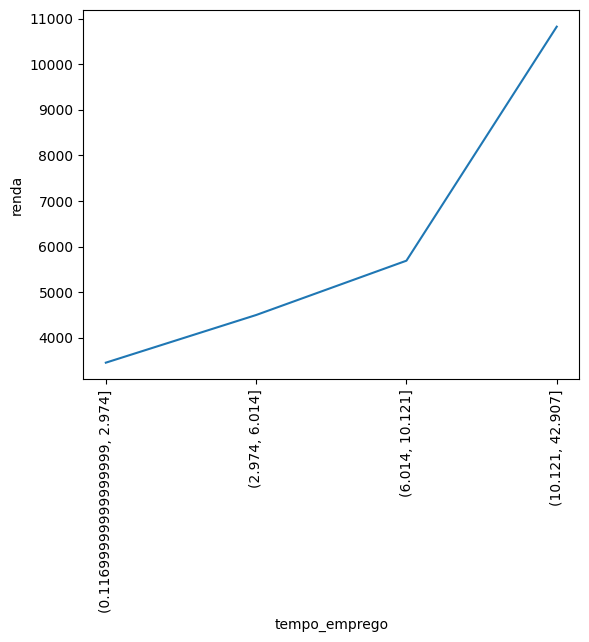

In [14]:
cat_srs, bins = pd.qcut(df['tempo_emprego'], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['renda'].mean()

ax = biv.plot.line()
ax.set_ylabel("renda")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

Também se observa que a renda dos clientes é maior quando possuem ensino superior completo.

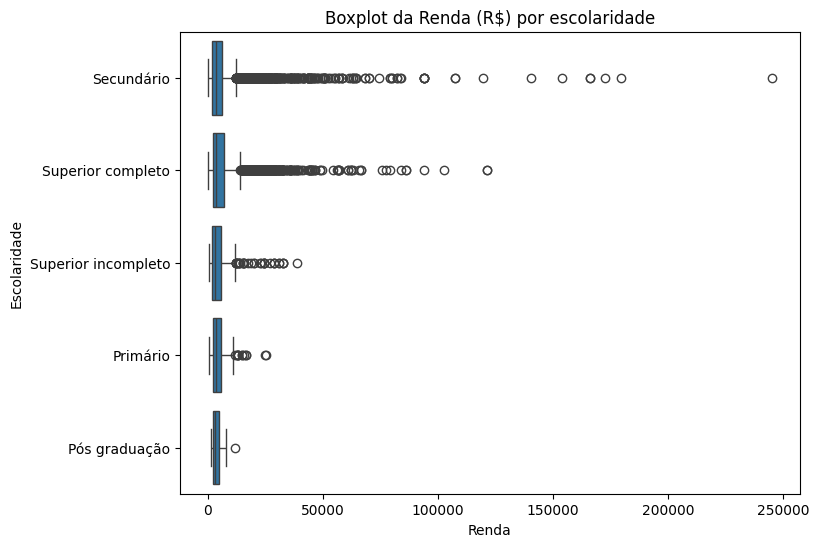

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='educacao', x='renda')
plt.title('Boxplot da Renda (R$) por escolaridade')
plt.xlabel('Renda')
plt.ylabel('Escolaridade')
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção
Neste caso, os dados já estão pré-selecionados
- limpeza
Precisaremos identificar e tratar dados faltantes
- construção
Neste primeiro exercício não faremos construção de novas variáveis
- integração
Temos apenas uma fonte de dados, não é necessário agregação
- formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [33]:
renda = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente', 'tempo_emprego'], axis=1)

In [34]:
renda.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [35]:
#tratamento de duplicadas

renda = renda.drop_duplicates()
renda = renda.reset_index(drop=True)
print(renda.shape)
print(renda.shape)
print(renda.info())

(10447, 11)
(10447, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   10447 non-null  object 
 1   posse_de_veiculo       10447 non-null  bool   
 2   posse_de_imovel        10447 non-null  bool   
 3   qtd_filhos             10447 non-null  int64  
 4   tipo_renda             10447 non-null  object 
 5   educacao               10447 non-null  object 
 6   estado_civil           10447 non-null  object 
 7   tipo_residencia        10447 non-null  object 
 8   idade                  10447 non-null  int64  
 9   qt_pessoas_residencia  10447 non-null  float64
 10  renda                  10447 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 755.1+ KB
None


In [36]:
#transformando variáveis em dummies
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'],
                      drop_first= True).copy()
renda.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residencia_Governamental       bool
dtype: object

In [37]:
#visualizar o dataframe
renda.head(1)

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,1.0,8060.34,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)
#### Dividindo a base em treino e teste



In [21]:
X = renda.drop(['renda'], axis=1).copy()
y = renda['renda']

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               10447 non-null  bool   
 1   posse_de_imovel                10447 non-null  bool   
 2   qtd_filhos                     10447 non-null  int64  
 3   idade                          10447 non-null  int64  
 4   qt_pessoas_residencia          10447 non-null  float64
 5   sexo_M                         10447 non-null  bool   
 6   tipo_renda_Bolsista            10447 non-null  bool   
 7   tipo_renda_Empresário          10447 non-null  bool   
 8   tipo_renda_Pensionista         10447 non-null  bool   
 9   tipo_renda_Servidor público    10447 non-null  bool   
 10  educacao_Pós graduação         10447 non-null  bool   
 11  educacao_Secundário            10447 non-null  bool   
 12  educacao_Superior completo     10447 non-null 

In [23]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10447 entries, 0 to 10446
Series name: renda
Non-Null Count  Dtype  
--------------  -----  
10447 non-null  float64
dtypes: float64(1)
memory usage: 81.7 KB


### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= True)


In [25]:
reg1 = DecisionTreeRegressor(max_depth=4)
reg2 = DecisionTreeRegressor(max_depth=8)

reg1.fit(X_test, y_test)
reg2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [26]:
mse1 = reg1.score(X_test, y_test)
mse2 = reg2.score(X_test, y_test)

template = 'O R-quadrado da árvore com profundidade {0} é: {1:.2f}'

print(template.format(reg1.get_depth(),mse1).replace('.',','))
print(template.format(reg2.get_depth(),mse2).replace('.',','))

O R-quadrado da árvore com profundidade 4 é: 0,14
O R-quadrado da árvore com profundidade 8 é: 0,36


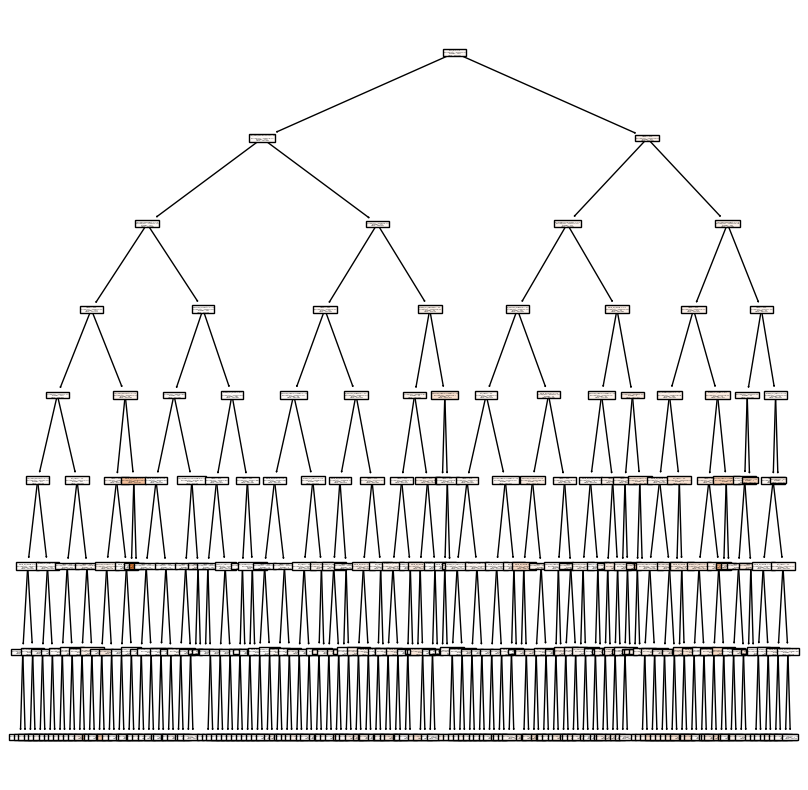

In [27]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg2,
                   feature_names=X_test.columns,
                   filled=True)

In [28]:
# Pré poda da melhor árvore

reg2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
reg2.fit(X_train, y_train)
mse1 = reg2.score(X_test, y_test)
mse1

0.08062727579141049

n_minimo,1,2,3,4,5,6,7,8
profundidade,,,,,,,,
1,0.085726,0.085726,0.085726,0.085726,0.085726,0.085726,0.085726,0.085726
2,0.099236,0.099236,0.099236,0.099236,0.099236,0.099236,0.099236,0.099236
3,0.100083,0.100083,0.100083,0.100083,0.100083,0.100083,0.100083,0.100083
4,0.033250,0.033250,0.033250,0.067597,0.067597,0.067597,0.067597,0.067597
5,0.111932,0.040503,0.040446,0.037080,0.078632,0.078632,0.078559,0.078559
6,0.083197,0.013371,0.013755,0.008383,0.050506,0.048784,0.051620,0.051772
7,0.093558,0.025214,0.025525,0.018382,0.034414,0.034201,0.037112,0.038837
8,0.118639,0.049661,0.053676,0.045130,0.062998,0.068438,0.063220,0.052565


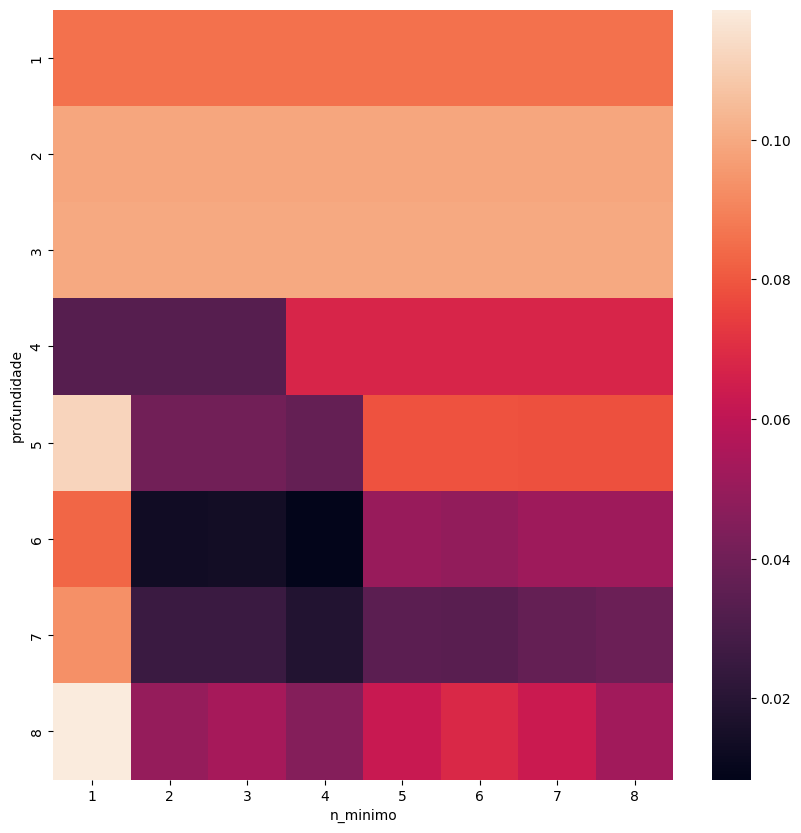

In [29]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(1, 9):
        reg2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg2.fit(X_train, y_train)
        mse1 = reg2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

## Etapa 5 Crisp-DM: Avaliação dos resultados



In [30]:
print(f"R² de treino é: {reg2.score(X_train, y_train)*100:.2f}%")
print(f"R² de teste é: {reg2.score(X_test, y_test)*100:.2f}%")

R² de treino é: 23.59%
R² de teste é: 5.26%
